In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv('/kaggle/input/building-permit-applications-data/Building_Permits.csv')
df


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/volcanic-eruptions/database.csv
/kaggle/input/kickstarter-projects/ks-projects-201801.csv
/kaggle/input/kickstarter-projects/ks-projects-201612.csv
/kaggle/input/building-permit-applications-data/Building_Permits.csv
/kaggle/input/building-permit-applications-data/DataDictionaryBuildingPermit.xlsx
/kaggle/input/earthquake-database/database.csv
/kaggle/input/landslide-events/catalog.csv


/tmp/ipykernel_21/2522426694.py:25: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/building-permit-applications-data/Building_Permits.csv')


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,NaN,Montgomery,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,NaN,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,NaN,Indiana,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,NaN,Sutter,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


In [2]:
#Missiing data count
missing_value_count = df.isnull().sum()
missing_value_count[:]

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

In [3]:
#what % of data is missing
total_cells = np.product(df.shape)
total_missing=missing_value_count.sum()
percentage_missing =(total_missing / total_cells)*100
percentage_missing


26.26002315058403

In [4]:
# remove all the rows that contain a missing value
df.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


In [5]:
# remove all columns with at least one missing value
columns_with_na_dropped = df.dropna(axis = 1)
columns_with_na_dropped.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


In [6]:
#data lost 
print(f"cloumns_in the original_dataset = {df.shape[1]}")
print(f"columns after dropping missing data values = {columns_with_na_dropped.shape[1]}")

cloumns_in the original_dataset = 43
columns after dropping missing data values = 12


In [7]:
#Removing all the rows or Coumns with missing value data we finally get same data that is after removing the empty data columns
new_data = columns_with_na_dropped


In [8]:
# filling in missing values {only dealing with a small subset of data for faster rum for now}
data_subset = df.loc[:,'Issued Date':'Fire Only Permit']
data_subset


,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit
0,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN
1,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN
3,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN
4,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
198895,12/05/2017,NaN,12/05/2017,NaN,NaN,NaN,NaN,NaN
198896,12/06/2017,NaN,12/06/2017,NaN,4.0,4.0,NaN,Y
198897,12/06/2017,NaN,12/06/2017,NaN,NaN,NaN,NaN,NaN
198898,12/06/2017,NaN,12/06/2017,NaN,NaN,NaN,NaN,NaN


In [9]:
data_subset.fillna(0)

,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit
0,11/09/2015,0,11/09/2015,0,6.0,0.0,0,0
1,08/03/2017,0,08/03/2017,0,7.0,0.0,0,0
2,0,0,0,0,6.0,6.0,0,0
3,07/18/2017,07/24/2017,07/18/2017,0,2.0,2.0,0,0
4,12/01/2017,0,11/20/2017,0,3.0,0.0,0,0
...,...,...,...,...,...,...,...,...
198895,12/05/2017,0,12/05/2017,0,0.0,0.0,0,0
198896,12/06/2017,0,12/06/2017,0,4.0,4.0,0,Y
198897,12/06/2017,0,12/06/2017,0,0.0,0.0,0,0
198898,12/06/2017,0,12/06/2017,0,0.0,0.0,0,0


In [10]:
# replace all NA's the value that comes directly after it in the same column, 
data_subset.fillna(method = 'bfill', axis=0).fillna(0)

,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit
0,11/09/2015,07/24/2017,11/09/2015,Y,6.0,6.0,Y,Y
1,08/03/2017,07/24/2017,08/03/2017,Y,7.0,6.0,Y,Y
2,07/18/2017,07/24/2017,07/18/2017,Y,6.0,6.0,Y,Y
3,07/18/2017,07/24/2017,07/18/2017,Y,2.0,2.0,Y,Y
4,12/01/2017,07/12/2017,11/20/2017,Y,3.0,5.0,Y,Y
...,...,...,...,...,...,...,...,...
198895,12/05/2017,0,12/05/2017,0,4.0,4.0,0,Y
198896,12/06/2017,0,12/06/2017,0,4.0,4.0,0,Y
198897,12/06/2017,0,12/06/2017,0,0.0,0.0,0,0
198898,12/06/2017,0,12/06/2017,0,0.0,0.0,0,0


In [11]:
# Scale and Normalize Data
data = pd.read_csv("/kaggle/input/kickstarter-projects/ks-projects-201801.csv")
data.isnull().sum()
# np.product(data.shape)


ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

/tmp/ipykernel_21/1968561946.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, ax=ax[0])
/tmp/ipykernel_21/1968561946.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_data, ax=ax[1])


Text(0.5, 1.0, 'Scaled data')

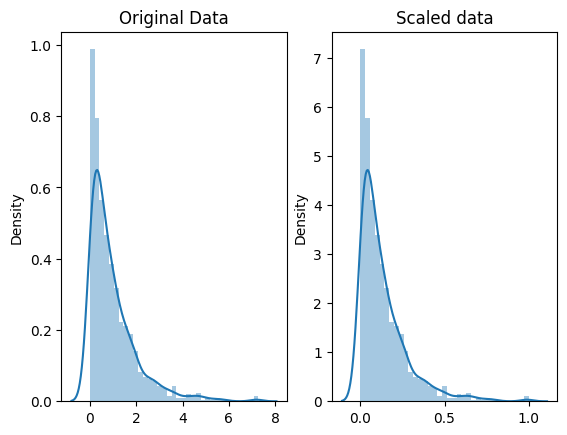

In [12]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)
original_data
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])
scaled_data
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

/tmp/ipykernel_21/2353335585.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, ax=ax[0])
/tmp/ipykernel_21/2353335585.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_data[0], ax=ax[1])


Text(0.5, 1.0, 'Normalized data')

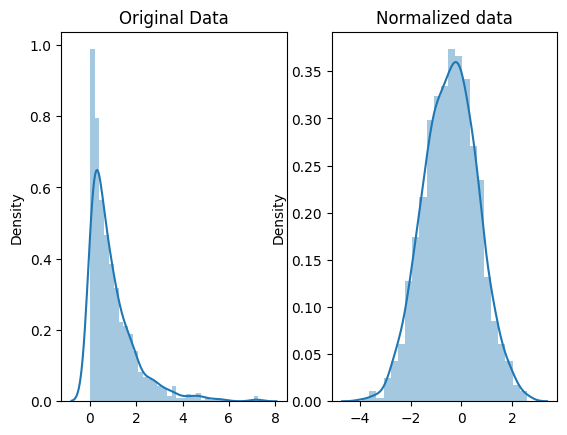

In [13]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

/opt/conda/lib/python3.10/site-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
/tmp/ipykernel_21/3021974750.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(usd_goal,ax=ax[0])
/tmp/ipykernel_21/3021974750.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-leve

Text(0.5, 1.0, 'scaled data')

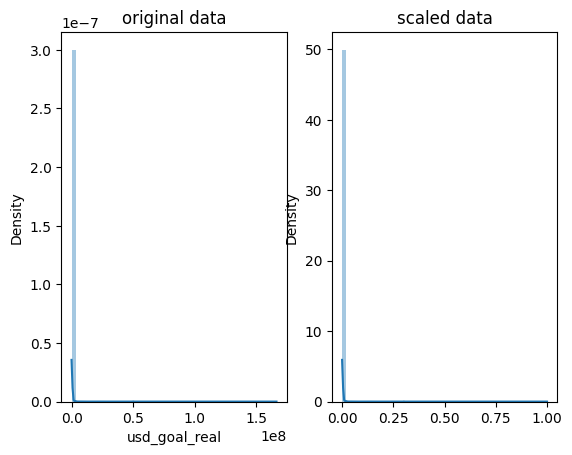

In [14]:
# scaling with kickstraters data
# select the usd_goal_real column
usd_goal = data.usd_goal_real

# scale the goals from 0 to 1
scaled_data = minmax_scaling(usd_goal, columns = [0])

# plot the original and scaled data together to compare
fig, ax= plt.subplots(1,2)
sns.distplot(usd_goal,ax=ax[0])
ax[0].set_title("original data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("scaled data")


/tmp/ipykernel_21/3623084491.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(usd_goal,ax=ax[0])
/tmp/ipykernel_21/3623084491.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_data[0], ax=ax[1])


Text(0.5, 1.0, 'normalized data')

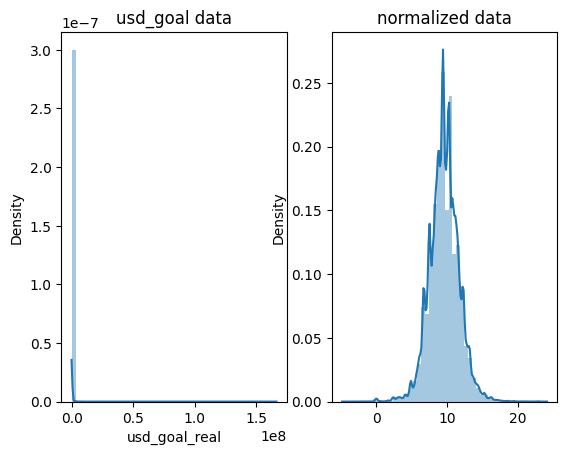

In [15]:
# Normalization with kickstraters data
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(usd_goal)
# plot the original and normalized data together to compare
fig, ax= plt.subplots(1,2)
sns.distplot(usd_goal,ax=ax[0])
ax[0].set_title("usd_goal data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("normalized data")

In [16]:
earthquakes = pd.read_csv("../input/earthquake-database/database.csv")
landslides = pd.read_csv("../input/landslide-events/catalog.csv")
volcanos = pd.read_csv("../input/volcanic-eruptions/database.csv")

In [17]:
earthquakes

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [18]:
landslides

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,NaN,United States,US,North Carolina,1646,Tryon,7.80866,...,"(35.221899999999998, -82.322599999999994)",Landslide,Rockfall,Small,NaN,NaN,0.0,0.0,Tryon Daily Bulletin,http://www.tryondailybulletin.com/2016/02/26/u...
1689,7537,2/22/16,0:00,NaN,United States,US,West Virginia,51400,Charleston,6.84721,...,"(38.398699999999998, -81.584800000000001)",Landslide,Mudslide,Small,Unknown,NaN,0.0,0.0,Charleston Gazette,http://www.wvgazettemail.com/news/20160222/us-...
1690,7539,2/23/16,NaN,NaN,United States,US,West Virginia,2406,Welch,14.19735,...,"(37.409599999999998, -81.4268)",Landslide,Landslide,Small,Rain,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/officials-cautio...
1691,7540,2/26/16,21:06,NaN,United States,US,West Virginia,1048,Athens,12.00678,...,"(37.501100000000001, -81.109300000000005)",Landslide,Rockfall,Small,Unknown,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/rockslide-snarls...


In [19]:
volcanos

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.870,500,No Data,Subduction Zone / Continental Crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...
1503,390130,Zavodovski,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,2016 CE,-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1504,390140,Protector Seamounts,United Kingdom,Antarctica,Submarine,Eruption Observed,1962 CE,-55.912,-28.167,-55,Rhyolite,Subduction Zone / Oceanic Crust (< 15 km)
1505,390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.450,165.500,2600,NaN,Intraplate / Continental Crust (>25 km)
1506,390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.150,-57.750,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)


In [20]:
# set seed for reproducibility
np.random.seed(0)

In [21]:
landslides['date'].head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [22]:
earthquakes['Date'].head()

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object

In [23]:
landslides['parsed_dates']= pd.to_datetime(landslides['date'], format= "%m/%d/%y")

In [24]:
landslides['parsed_dates']

0      2007-03-02
1      2007-03-22
2      2007-04-06
3      2007-04-14
4      2007-04-15
          ...    
1688   2015-12-07
1689   2016-02-22
1690   2016-02-23
1691   2016-02-26
1692   2016-03-02
Name: parsed_dates, Length: 1693, dtype: datetime64[ns]

In [25]:
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format=True)
earthquakes['date_parsed'].head()

0    1965-01-02 00:00:00
1    1965-01-04 00:00:00
2    1965-01-05 00:00:00
3    1965-01-08 00:00:00
4    1965-01-09 00:00:00
Name: date_parsed, dtype: object

In [26]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['parsed_dates'].dt.day
day_of_month_landslides

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
        ... 
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: parsed_dates, Length: 1693, dtype: float64

/tmp/ipykernel_21/874821634.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_of_month_landslides, kde=False, bins=31)


<AxesSubplot: xlabel='parsed_dates'>

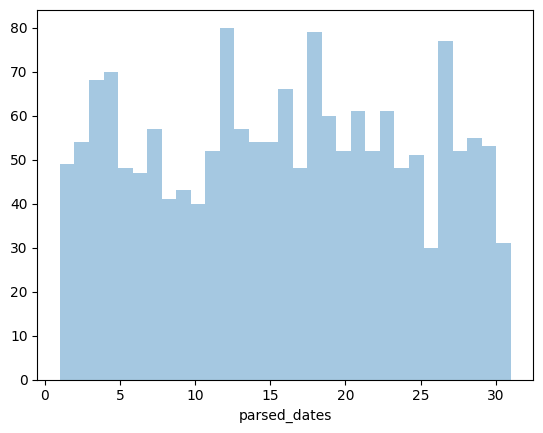

In [27]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()
# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)